## Analysing time course scRNA-seq of naive to TSCs and EXMCs conversion at D0, D1, D2, D4, D8, D13, D18 and D70 sorted EXMCs

In [1]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/timecourse_naive2TSCs_EXMCs")

Libraries

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(hdf5r))
set.seed(1234)
library(viridis)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Warning message:
“package ‘hdf5r’ was built under R version 4.1.1”
Loading required package: viridisLite



In [3]:
suppressMessages(library(Matrix))

In [4]:
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Brussels’ (or equivalent)”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [5]:
library(tibble)

In [6]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [7]:
library(wacolors)

## Loading count matrix with gene symbols

In [8]:
mat <- read.csv("scRNA_seq_timecourse_naiveTSC_count_matrix.csv",row.names =1)

In [9]:
head(mat)
dim(mat)
class(mat)

AAACCCATCTTCGCTG.1 AAACGCTAGACCTTTG.1 AAACGCTTCACCTCGT.1
SCYL3    0                  0                  0                 
C1orf112 1                  0                  0                 
FGR      0                  0                  0                 
CFH      0                  0                  0                 
STPG1    0                  1                  0                 
NIPAL3   0                  0                  0                 
         AAAGAACTCCCTCTAG.1 AAAGGATTCTCGCTCA.1 AAAGGGCAGTTCCGGC.1
SCYL3    0                  0                  0                 
C1orf112 0                  0                  0                 
FGR      0                  0                  0                 
CFH      0                  0                  0                 
STPG1    0                  2                  0                 
NIPAL3   0                  1                  0                 
         AAAGGGCGTCATCTAG.1 AAAGGTAAGGAACTCG.1 AAAGGTAGTATCGGTT.1
SCYL3    0                  0                  0                 
C1orf112 0                  1                  0                 
FGR      0                  0                  0                 
CFH      0                  0                  0                 
STPG1    0                  0                  2                 
NIPAL3   0                  0                  0                 
         AAAGTCCTCGGAACTT.1 ⋯ TTTGACTGTTTCACTT.1 TTTGGAGCAAGTTTGC.1
SCYL3    0                  ⋯ 0                  0                 
C1orf112 0                  ⋯ 0                  0                 
FGR      0                  ⋯ 0                  0                 
CFH      0                  ⋯ 0                  0                 
STPG1    1                  ⋯ 0                  0                 
NIPAL3   0                  ⋯ 1                  0                 
         TTTGGAGCAATGCAAA.1 TTTGGAGGTGGTAACG.1 TTTGGTTAGCATGAAT.1
SCYL3    0                  0                  0                 
C1orf112 1                  0                  0                 
FGR      0                  0                  0                 
CFH      0                  0                  0                 
STPG1    0                  0                  0                 
NIPAL3   1                  0                  1                 
         TTTGGTTGTCGGCACT.1 TTTGGTTTCACCATCC.1 TTTGGTTTCGCTCTAC.1
SCYL3    0                  0                  0                 
C1orf112 0                  0                  0                 
FGR      0                  0                  0                 
CFH      0                  0                  0                 
STPG1    1                  0                  0                 
NIPAL3   0                  0                  0                 
         TTTGGTTTCTCAGTCC.1 TTTGTTGGTGTGACCC.1
SCYL3    1                  0                 
C1orf112 0                  0                 
FGR      0                  0                 
CFH      0                  0                 
STPG1    0                  0                 
NIPAL3   0                  1

[1] 24730 12978

[1] "data.frame"

In [10]:
anno<- read.csv("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/timecourse_naive2TSCs_EXMCs/bc_list_uniq.csv")

In [11]:
head(anno)

X cell               Samples
1 1 AAACCCACACGACCTG.1 D0     
2 2 AAACCCATCTTCGCTG.1 D0     
3 3 AAACGAAAGGGACACT.1 D0     
4 4 AAACGAACATGGTACT.1 D0     
5 5 AAACGCTAGACCTTTG.1 D0     
6 6 AAACGCTTCACCTCGT.1 D0

## Create Seurat object 

In [12]:
so <- CreateSeuratObject(
  counts = mat,
  project = "tc_XA", 
  min.cells = 0,
  min.features = 0)

In [13]:
so

An object of class Seurat 
24730 features across 12978 samples within 1 assay 
Active assay: RNA (24730 features, 0 variable features)

In [14]:
head(so@meta.data)

orig.ident nCount_RNA nFeature_RNA
AAACCCATCTTCGCTG.1 tc_XA      29982      6390        
AAACGCTAGACCTTTG.1 tc_XA      58427      7486        
AAACGCTTCACCTCGT.1 tc_XA      37718      6780        
AAAGAACTCCCTCTAG.1 tc_XA      12857      3977        
AAAGGATTCTCGCTCA.1 tc_XA      34149      6625        
AAAGGGCAGTTCCGGC.1 tc_XA      39409      6588

In [15]:
all(row.names(so@meta.data)%in%anno$cell)

[1] TRUE

In [16]:
so@meta.data$cell<- row.names(so@meta.data)

In [17]:
so@meta.data<- left_join(so@meta.data, anno, by = "cell")

In [18]:
head(so@meta.data)

orig.ident nCount_RNA nFeature_RNA cell               X  Samples
1 tc_XA      29982      6390         AAACCCATCTTCGCTG.1  2 D0     
2 tc_XA      58427      7486         AAACGCTAGACCTTTG.1  5 D0     
3 tc_XA      37718      6780         AAACGCTTCACCTCGT.1  6 D0     
4 tc_XA      12857      3977         AAAGAACTCCCTCTAG.1  8 D0     
5 tc_XA      34149      6625         AAAGGATTCTCGCTCA.1 12 D0     
6 tc_XA      39409      6588         AAAGGGCAGTTCCGGC.1 13 D0

In [19]:
row.names(so@meta.data)<- so$cell

In [20]:
so@meta.data<- so@meta.data[, -5]

In [21]:
head(so@meta.data)

orig.ident nCount_RNA nFeature_RNA cell              
AAACCCATCTTCGCTG.1 tc_XA      29982      6390         AAACCCATCTTCGCTG.1
AAACGCTAGACCTTTG.1 tc_XA      58427      7486         AAACGCTAGACCTTTG.1
AAACGCTTCACCTCGT.1 tc_XA      37718      6780         AAACGCTTCACCTCGT.1
AAAGAACTCCCTCTAG.1 tc_XA      12857      3977         AAAGAACTCCCTCTAG.1
AAAGGATTCTCGCTCA.1 tc_XA      34149      6625         AAAGGATTCTCGCTCA.1
AAAGGGCAGTTCCGGC.1 tc_XA      39409      6588         AAAGGGCAGTTCCGGC.1
                   Samples
AAACCCATCTTCGCTG.1 D0     
AAACGCTAGACCTTTG.1 D0     
AAACGCTTCACCTCGT.1 D0     
AAAGAACTCCCTCTAG.1 D0     
AAAGGATTCTCGCTCA.1 D0     
AAAGGGCAGTTCCGGC.1 D0

In [22]:
MT.gene <- grep(pattern = "^MT-", x = rownames(mat), value = TRUE) 

In [23]:
head(MT.gene)

[1] "MT-ND6" "MT-CO2" "MT-CYB" "MT-ND2" "MT-ND5" "MT-CO1"

In [24]:
so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^MT[-]")

In [25]:
head(so@meta.data)

orig.ident nCount_RNA nFeature_RNA cell              
AAACCCATCTTCGCTG.1 tc_XA      29982      6390         AAACCCATCTTCGCTG.1
AAACGCTAGACCTTTG.1 tc_XA      58427      7486         AAACGCTAGACCTTTG.1
AAACGCTTCACCTCGT.1 tc_XA      37718      6780         AAACGCTTCACCTCGT.1
AAAGAACTCCCTCTAG.1 tc_XA      12857      3977         AAAGAACTCCCTCTAG.1
AAAGGATTCTCGCTCA.1 tc_XA      34149      6625         AAAGGATTCTCGCTCA.1
AAAGGGCAGTTCCGGC.1 tc_XA      39409      6588         AAAGGGCAGTTCCGGC.1
                   Samples percent.mt
AAACCCATCTTCGCTG.1 D0       5.409913 
AAACGCTAGACCTTTG.1 D0      11.005186 
AAACGCTTCACCTCGT.1 D0       5.302508 
AAAGAACTCCCTCTAG.1 D0       8.127868 
AAAGGATTCTCGCTCA.1 D0       6.020674 
AAAGGGCAGTTCCGGC.1 D0       4.826309

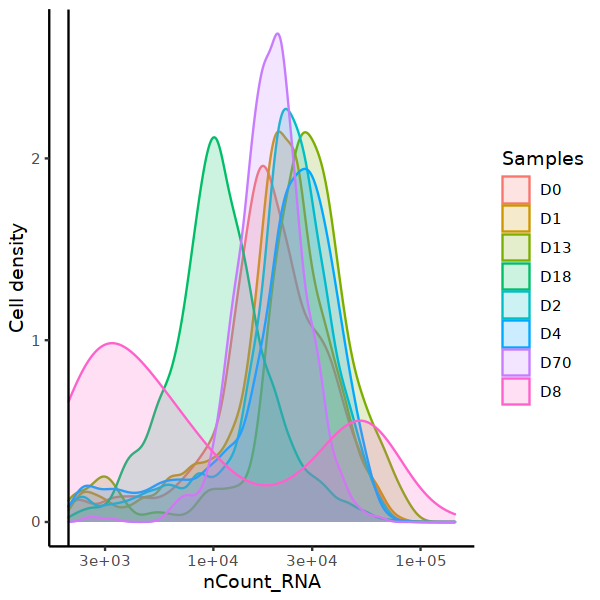

In [26]:
options(repr.plot.width=5, repr.plot.height=5)
so@meta.data %>% 
  	ggplot(aes(color=Samples, x=nCount_RNA, fill= Samples)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	ylab("Cell density") +
  	geom_vline(xintercept = 2000)

In [27]:
so_2000<- subset(so, subset = nFeature_RNA > 200 & nFeature_RNA < 8000& percent.mt<20 &nCount_RNA>2000)

In [28]:
so_2000

An object of class Seurat 
24730 features across 12978 samples within 1 assay 
Active assay: RNA (24730 features, 0 variable features)

In [29]:
dim(so_2000)

[1] 24730 12978

## Normalization

In [30]:
so_2000 <- NormalizeData(object = so_2000, normalization.method = "LogNormalize", 
    scale.factor = 10000)

## Identification of highly variable features (feature selection)

In [31]:
so_2000 <- FindVariableFeatures(so_2000, selection.method = "vst", nfeatures = 2000) # Chose another nfeature

In [32]:
dim(so_2000@assays$RNA)
so_2000@assays$RNA[1:5,1:5]

[1] 24730 12978

5 x 5 sparse Matrix of class "dgCMatrix"
         AAACCCATCTTCGCTG.1 AAACGCTAGACCTTTG.1 AAACGCTTCACCTCGT.1
SCYL3             .                  .                          .
C1orf112          0.2878322          .                          .
FGR               .                  .                          .
CFH               .                  .                          .
STPG1             .                  0.1579894                  .
         AAAGAACTCCCTCTAG.1 AAAGGATTCTCGCTCA.1
SCYL3                     .          .        
C1orf112                  .          .        
FGR                       .          .        
CFH                       .          .        
STPG1                     .          0.4610062

In [33]:
top10 <- head(VariableFeatures(so_2000), 10)

In [53]:
print(top10)

 [1] "ACTC1"   "SPP1"    "KRT7"    "PTN"     "CGA"     "NPPB"    "ALDH1A1"
 [8] "PTX3"    "CCNA1"   "IGFBP5" 


Plot variable features with and without labels

## Scaling the data

In [54]:
all.genes <- rownames(so_2000)

In [55]:
so_2000 <- ScaleData(so_2000, features = all.genes)

Centering and scaling data matrix



In [56]:
dim(so_2000@assays$RNA)

[1] 24730 12978

## PCA on the total dataset

In [57]:
so_2000 <- RunPCA(so_2000, features = VariableFeatures(object = so_2000),npcs=60,nfeatures.print=10,ndims.print=1:5,seed.use=13)

PC_ 1 
Positive:  NLRP7, DPPA5, KHDC1L, POU5F1, KHDC3L, NLRP2, ALPG, ASRGL1, L1TD1, UTF1 
Negative:  COL3A1, VIM, LUM, FN1, COL4A1, MARCKS, COL5A2, CD99, PITX1, H19 
PC_ 2 
Positive:  HAPLN1, CLEC1B, MMP1, TAC3, HAND1, RSPO2, EBPL, CSRP2, PRSS35, AQP1 
Negative:  IGFBP5, SDC2, ACTG2, IGFBP7, TXNRD1, THBS1, SLC10A4, PTGIS, MYH9, PTX3 
PC_ 3 
Positive:  MEG3, COL14A1, HGF, TFPI2, POSTN, IGFBP7, GYPC, MEG8, SLC10A4, GNG11 
Negative:  KRT7, PTN, LRP2, CLDN4, UCA1, SPP1, MIR205HG, TINAGL1, ITGA2, ACTC1 
PC_ 4 
Positive:  CCPG1, RPS27, ZNF483, IFI16, SLC7A8, PHLDA1, CRYBA4, RPS21, BST2, GDF15 
Negative:  MT1H, MT1E, MT1M, MT1F, MT1G, MT2A, LEFTY2, ODC1, PRAP1, KLF4 
PC_ 5 
Positive:  MALAT1, UACA, AHNAK, CENPF, NEAT1, ASPM, SNHG14, MKI67, KNL1, SLC9A3R1 
Negative:  FTH1, KRT7, PRDX1, SDC2, SLC10A4, IGFBP5, PLAAT3, ID3, FTL, IGFBP7 



In [58]:
print(so_2000[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  NLRP7, DPPA5, KHDC1L, POU5F1, KHDC3L 
Negative:  COL3A1, VIM, LUM, FN1, COL4A1 
PC_ 2 
Positive:  HAPLN1, CLEC1B, MMP1, TAC3, HAND1 
Negative:  IGFBP5, SDC2, ACTG2, IGFBP7, TXNRD1 
PC_ 3 
Positive:  MEG3, COL14A1, HGF, TFPI2, POSTN 
Negative:  KRT7, PTN, LRP2, CLDN4, UCA1 
PC_ 4 
Positive:  CCPG1, RPS27, ZNF483, IFI16, SLC7A8 
Negative:  MT1H, MT1E, MT1M, MT1F, MT1G 
PC_ 5 
Positive:  MALAT1, UACA, AHNAK, CENPF, NEAT1 
Negative:  FTH1, KRT7, PRDX1, SDC2, SLC10A4 


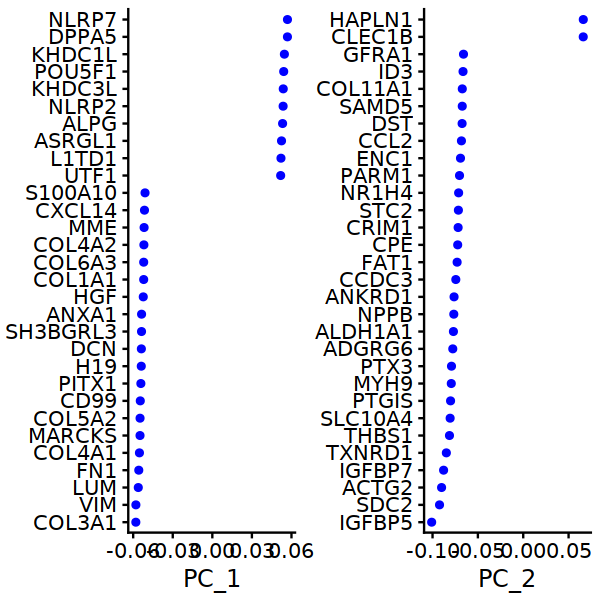

In [59]:
VizDimLoadings(so_2000, dims = 1:2, reduction = "pca")

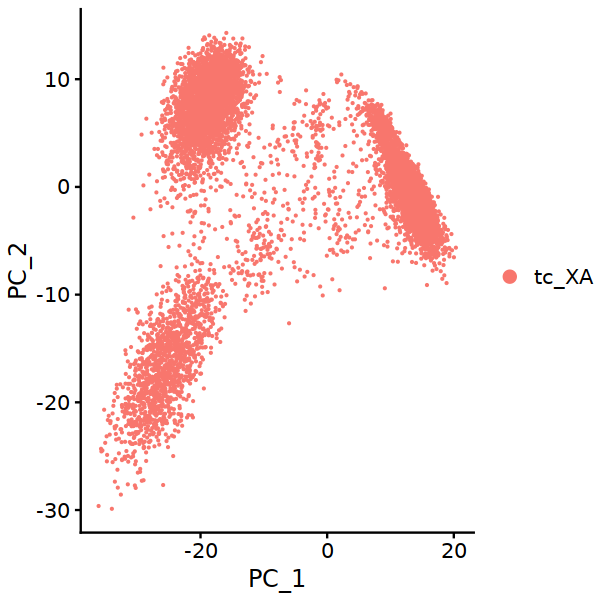

In [60]:
DimPlot(so_2000, reduction = "pca")

Elbow plot

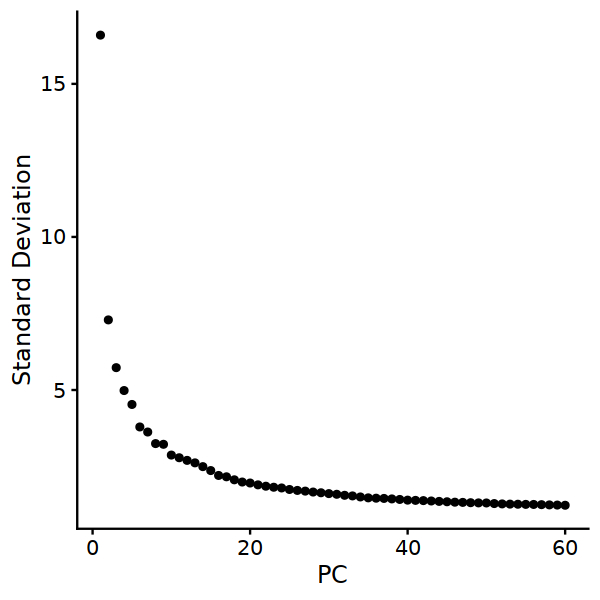

In [61]:
ElbowPlot(
 so_2000,
  ndims = 60)

In [62]:
use.pcs = 1:20

## Cluster the cells

In [63]:
so_2000 <- FindNeighbors(so_2000, dims = use.pcs)

Computing nearest neighbor graph

Computing SNN



In [64]:
so_2000 <- FindClusters(
    object = so_2000, 
    reduction.type = "pca", 
    dims.use = use.pcs, 
    resolution =0.2, 
    print.output = FALSE, 
    save.SNN = TRUE)

Warning message:
“The following arguments are not used: reduction.type, dims.use, print.output, save.SNN”
Suggested parameter: reduction instead of reduction.type; dims instead of dims.use; verbose instead of print.output


Warning message:
“The following arguments are not used: reduction.type, dims.use, print.output, save.SNN”
Suggested parameter: reduction instead of reduction.type; dims instead of dims.use; verbose instead of print.output




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12978
Number of edges: 437576

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9491
Number of communities: 8
Elapsed time: 1 seconds


## Run umap

In [65]:
so_2000 <- RunUMAP(
  object = so_2000,
  reduction = "pca",
  dims = use.pcs)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:02:32 UMAP embedding parameters a = 0.9922 b = 1.112

15:02:32 Read 12978 rows and found 20 numeric columns

15:02:32 Using Annoy for neighbor search, n_neighbors = 30

15:02:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:02:33 Writing NN index file to temp file /tmp/RtmpnXwd6q/file864e312e8a5b

15:02:33 Searching Annoy index using 1 thread, search_k = 3000

15:02:36 Annoy recall = 100%

15:02:37 Commencing smooth kNN distance calibration using 1 thread

15:02:38 Initializing fr

Vizualize umap

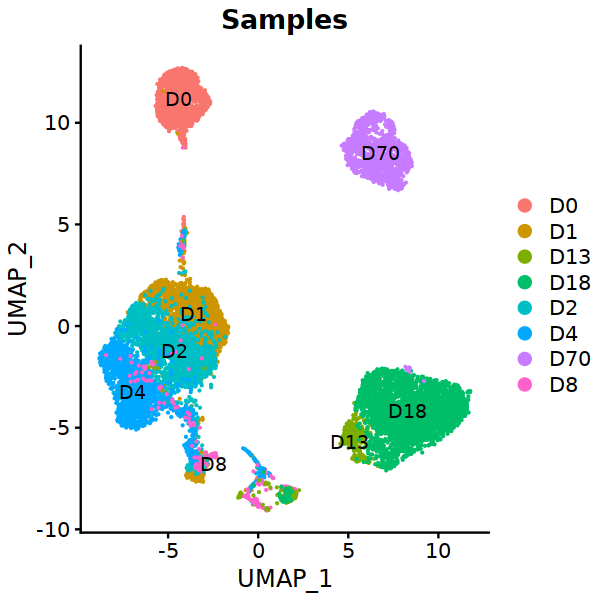

In [66]:
options(repr.plot.width=5, repr.plot.height=5)
DimPlot(so_2000, reduction = "umap", group="Samples",label = T , label.size = 4)

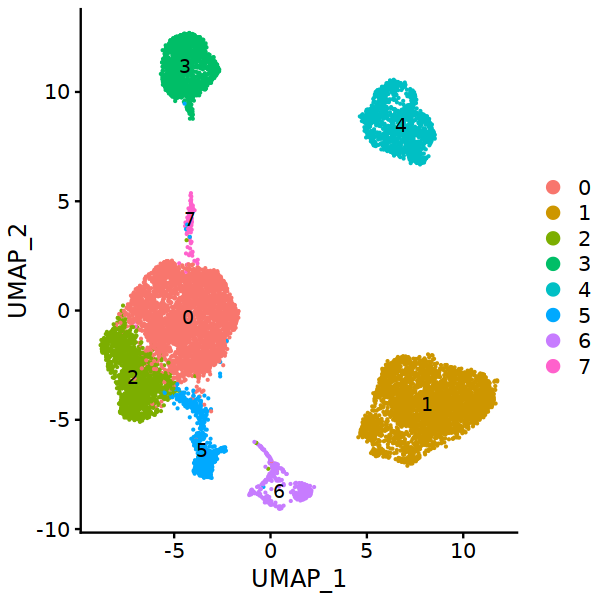

In [67]:
options(repr.plot.width=5, repr.plot.height=5)
DimPlot(so_2000, reduction = "umap", label = T , label.size = 4)

In [68]:
options(repr.plot.width=8, repr.plot.height=5)
number_perCluster<- table(so_2000@meta.data$RNA_snn_res.0.2, 
                          so_2000@meta.data$Samples)
number_perCluster

   
      D0   D1  D13  D18   D2   D4  D70   D8
  0    0 1725    5    0 1953   85    0   18
  1    0    0  312 3194    0    0    6    3
  2    3   13    1    0  120 1542    0   28
  3 1460    1    0    0    0    0    0    1
  4    0    0    0    0    0    0 1350    0
  5    2  212    0    1  175  165    0   82
  6   16   15  116   51   22   53    0  111
  7   28   42    1    0   36   25    0    5

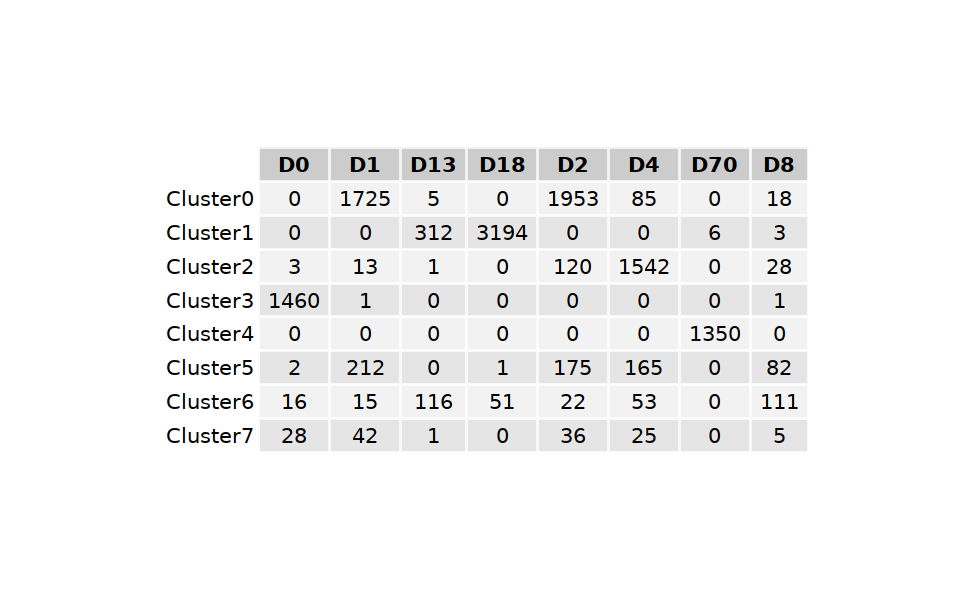

In [71]:
options(repr.plot.width=8, repr.plot.height=5)
number_perCluster<- table(so_2000@meta.data$RNA_snn_res.0.2, 
                          so_2000@meta.data$Samples)

    dimnames(number_perCluster) = list(c("Cluster0", "Cluster1", "Cluster2", "Cluster3", "Cluster4", "Cluster5", "Cluster6", "Cluster7"),
                                       c("D0", "D1",  "D13", "D18", "D2","D4", "D70", "D8"))


grid.table(number_perCluster)


In [76]:
so_2000$anno.cluster<- as.character(so_2000$seurat_clusters)

In [77]:
so_2000$anno.cluster[which(so_2000$seurat_clusters=="7" )]<- "8CLC"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="3" )]<- "naive"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="4" )]<- "late.EXMC"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="1" )]<- "early.EXMC"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="6" )]<- "TSC"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="0" )]<- "intermediate.1"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="2" )]<- "intermediate.2"
so_2000$anno.cluster[which(so_2000$seurat_clusters=="5" )]<- "intermediate.3"

In [78]:
so_2000$anno.cluster<- factor(so_2000$anno.cluster, levels=c("8CLC","naive","intermediate.1", "intermediate.2", "intermediate.3", "TSC", "early.EXMC", "late.EXMC"))

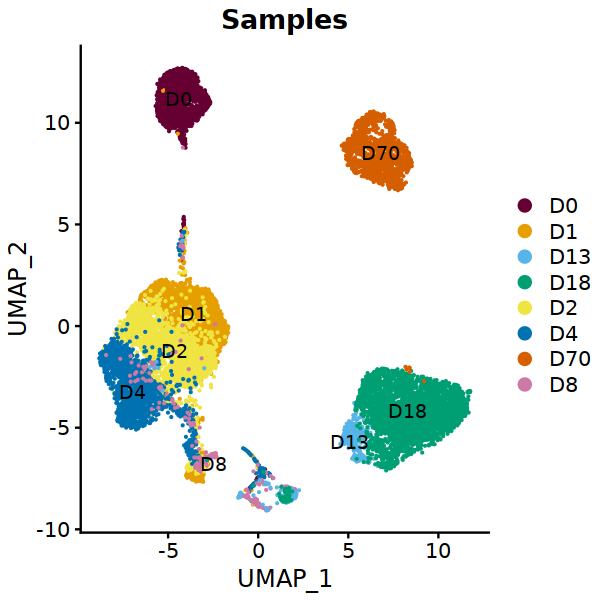

In [83]:
options(repr.plot.width=5, repr.plot.height=5)
umap<- DimPlot(so_2000, label = T, group.by = "Samples", cols = c("#660033", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"))
umap

In [84]:
pdf("Figures/Fig5B_UMAP_naive_TSC_VPtc.pdf", width = 5, height = 5)
plot(umap)
dev.off()

png 
  2

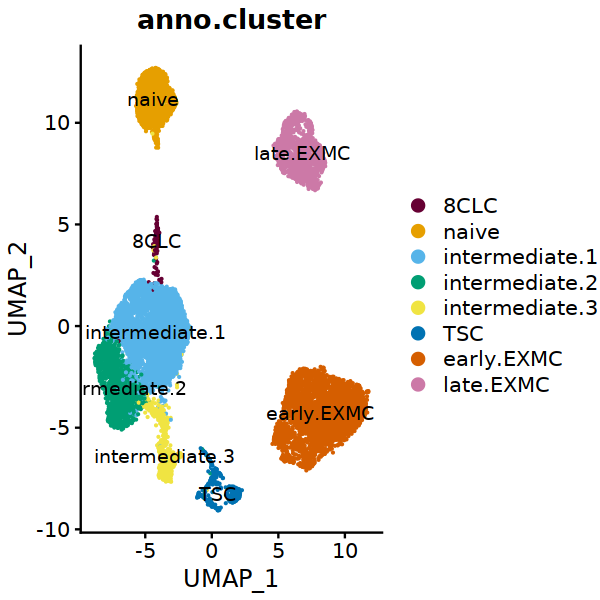

In [79]:
options(repr.plot.width=5, repr.plot.height=5)
umap<- DimPlot(so_2000, label = T, group.by = "anno.cluster", cols = c("#660033", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"))
umap

In [82]:
pdf("Figures/Fig5C_UMAP_naive_TSC_VPtc.pdf", width = 5, height = 5)
plot(umap)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



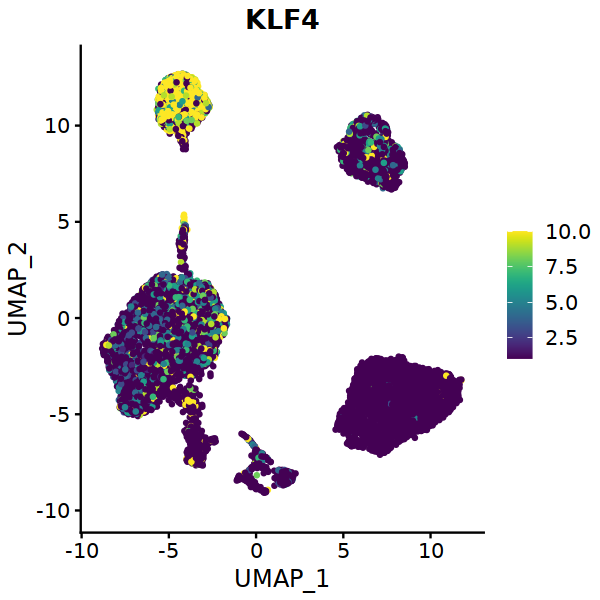

In [111]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("KLF4"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [128]:
pdf("Figures/Fig5D_UMAP_timecourse_KLF4.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



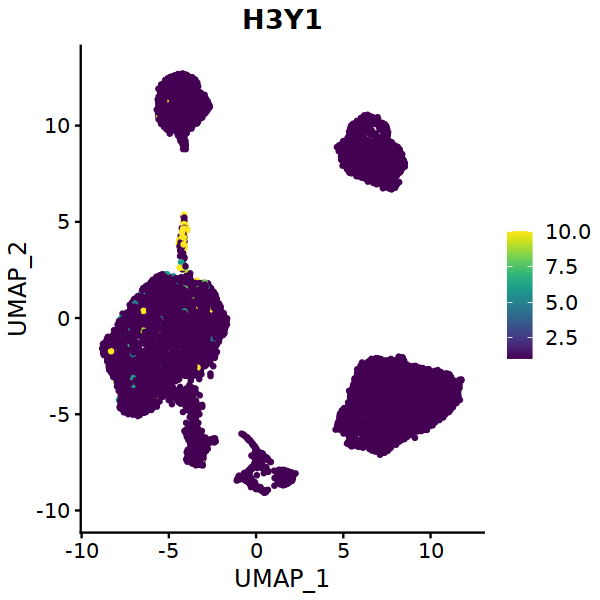

In [129]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("H3Y1"),
  max.cutoff = 'q55'
)+
scale_colour_viridis()

p

In [130]:
pdf("Figures/Fig5D_UMAP_timecourse_H3Y1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



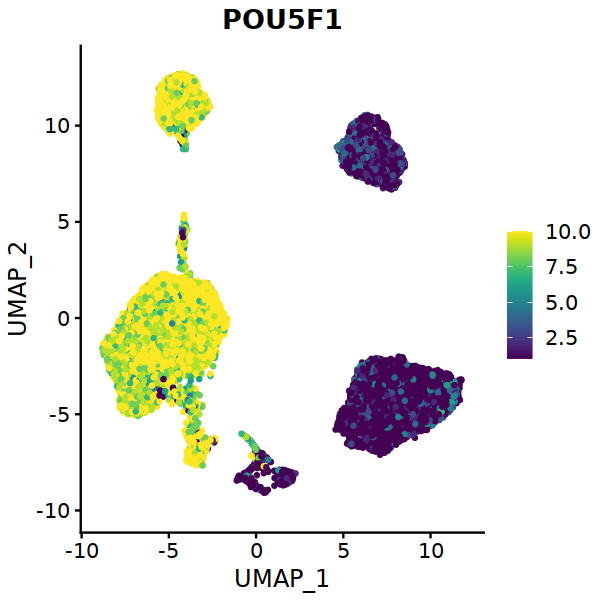

In [131]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("POU5F1"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [132]:
pdf("Figures/Fig5D_UMAP_timecourse_POU5F1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



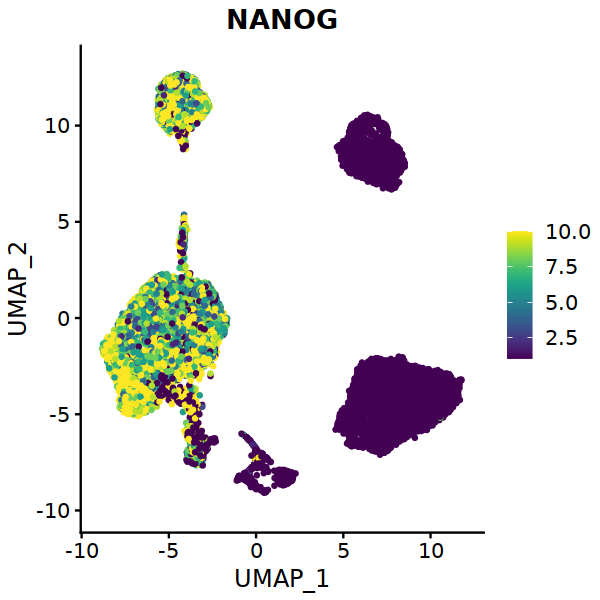

In [133]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("NANOG"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [134]:
pdf("Figures/Fig5D_UMAP_timecourse_NANOG.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



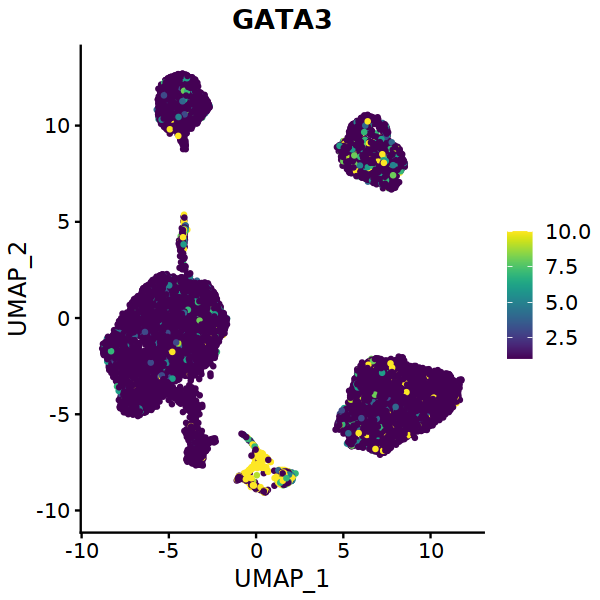

In [135]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("GATA3"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [136]:
pdf("Figures/Fig5D_UMAP_timecourse_GATA3.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



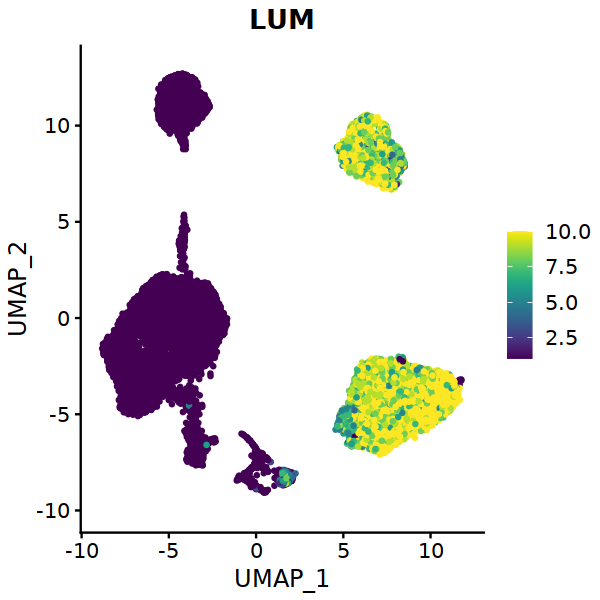

In [137]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("LUM"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [138]:
pdf("Figures/Fig5D_UMAP_timecourse_LUM.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



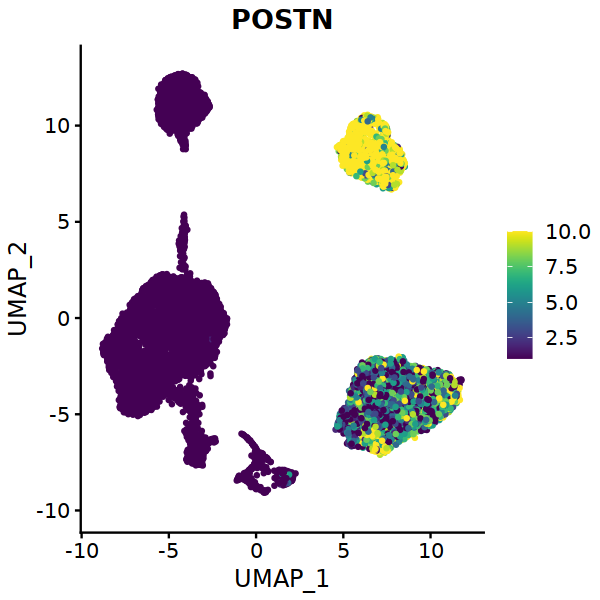

In [139]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("POSTN"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [140]:
pdf("Figures/Fig5D_UMAP_timecourse_POSTN.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



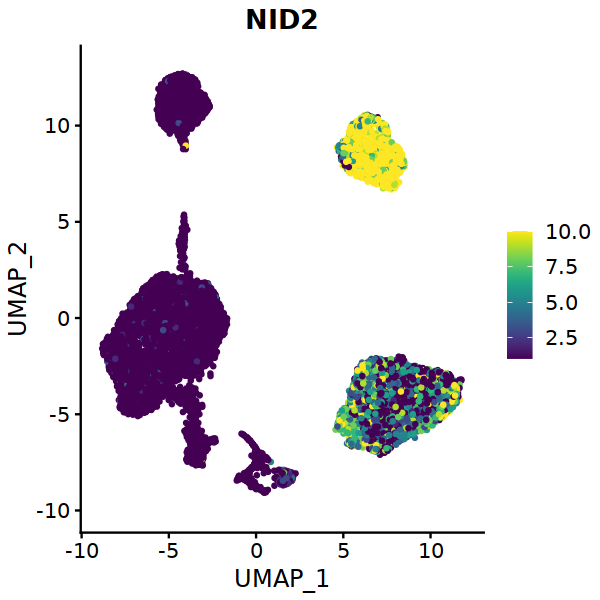

In [141]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("NID2"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [142]:
pdf("Figures/Fig5D_UMAP_timecourse_NID2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



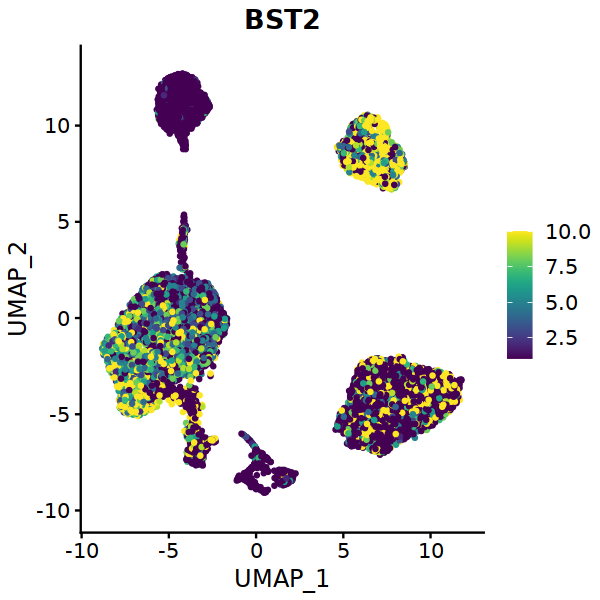

In [143]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,pt.size = 0.8,
  features = c("BST2"),
  max.cutoff = 'q75'
)+
scale_colour_viridis()

p

In [144]:
pdf("Figures/Fig5D_UMAP_timecourse_BST2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

In [85]:
DF_Count <- so_2000@meta.data %>%group_by(Samples,anno.cluster) %>%
  count() %>%
  ungroup() %>%
  group_by(Samples) %>%
  mutate(Freq = n/sum(n)*100)


In [86]:
head(DF_Count)

Samples anno.cluster   n    Freq      
1 D0      8CLC             28  1.8555335
2 D0      naive          1460 96.7528164
3 D0      intermediate.2    3  0.1988072
4 D0      intermediate.3    2  0.1325381
5 D0      TSC              16  1.0603048
6 D1      8CLC             42  2.0916335

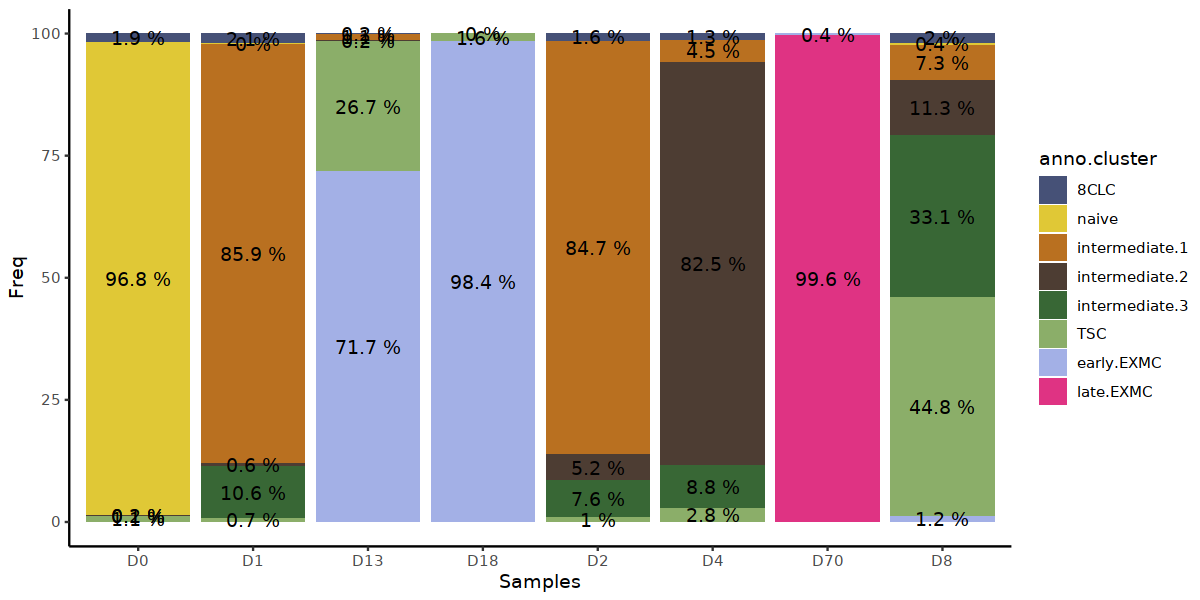

In [89]:
options(repr.plot.width=10, repr.plot.height=5)
p<- ggplot(DF_Count, aes(x = Samples, y = Freq, fill = anno.cluster))+
  geom_col()+
  geom_text(aes(label = paste(round(Freq, 1),"%")),position = position_stack(vjust = 0.5))+
    scale_fill_wa_d(wacolors$rainier)+ 
    theme_classic()
p

In [90]:
pdf("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/timecourse_naive2TSCs_EXMCs/Figures/Fig5E_timecourse_CellProportion.pdf", width = 10, height = 5)
plot(p)
dev.off()

png 
  2

In [9]:
gene_list <-  c( "POU5F1","SOX2", "NANOG", #core
               "OTX2", "ZIC2", "CD24","DUSP6", "TCF4", #primed
                "KLF17", "KLF4", "SUSD2", "DNMT3L","DPPA5", "TFCP2L1",   #naive
               "GATA2","GATA3", "ITGA6", "TP63", "KRT7", "KRT18", "HAND1","NR2F2",#trophectoderm
             "LUM", "NID2", "FOXF1", "HAND1", "VIM", "POSTN","ANXA1", "PITX1", # EXM
                "SOX17", "GATA4", "GATA6","FOXA2", "PDGFRA", "CDH2",#prE
                "HLA-G", "MMP2",  #EVT
                "CGA", "CGB3", "SDC1", "CK7", #ST 
                "WNT6", "GABRP", "ISL1", "HEY1", "HAND1", "CDH10","CTSV","TPM1", #Amnion  
                "MIXL1", "MESP1", "EPHA4", "ZIC3", "GSC", "TBXT", "FOXF1", "HAND1", "CDX1", "CDX2", "CDX4","EOMES" #Mesoderm
            )

Warning message in DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "anno.cluster"):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: CK7”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



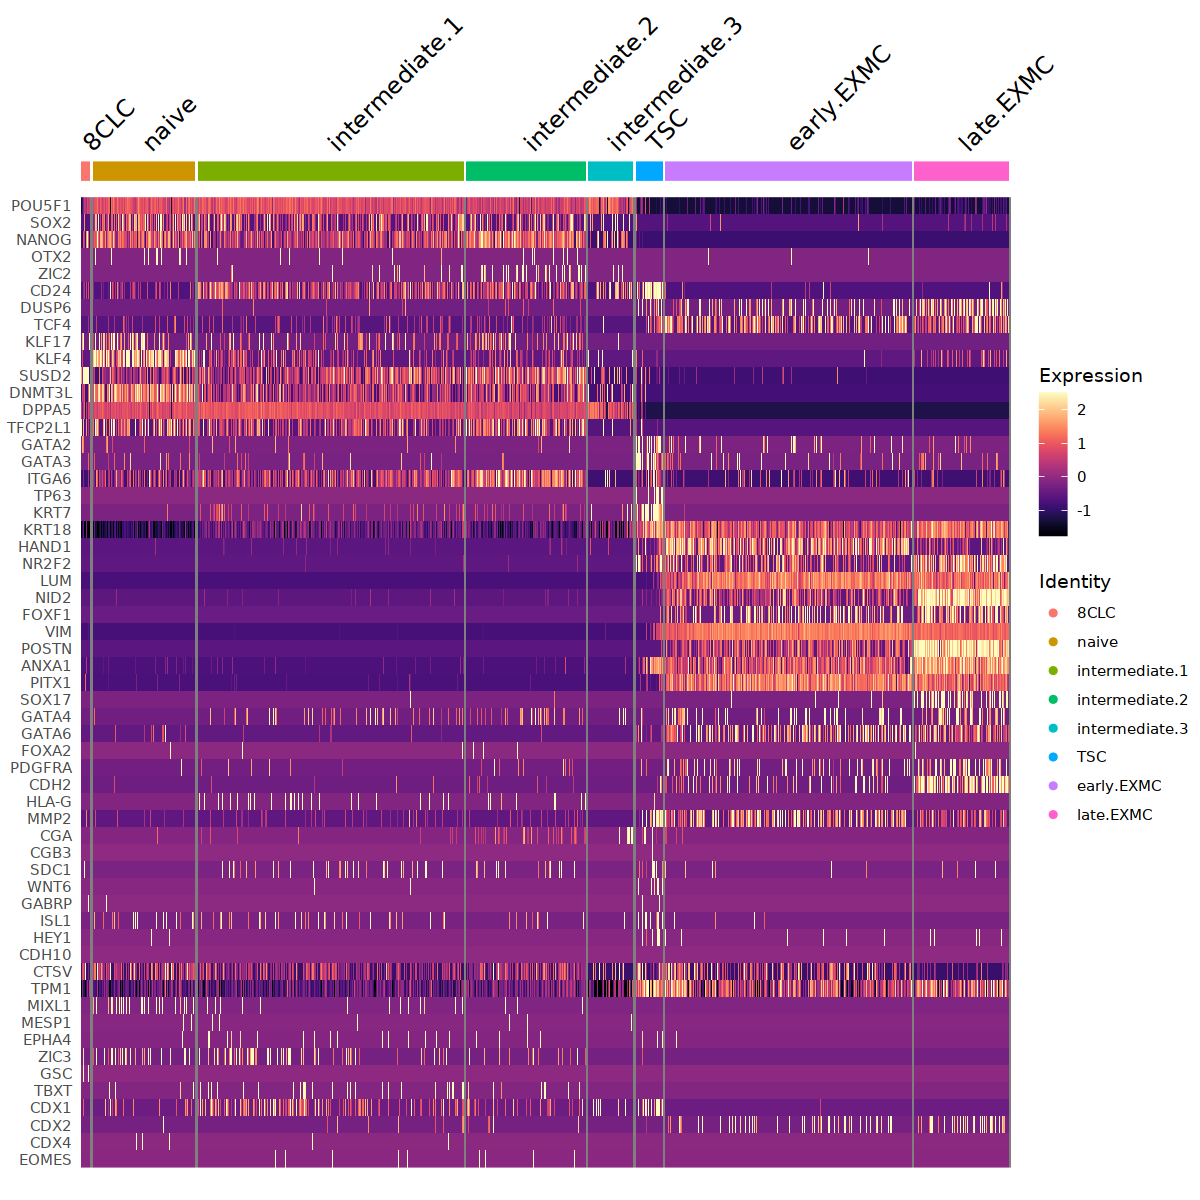

In [165]:
options(repr.plot.width=10, repr.plot.height=10)
heatmap<- DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "anno.cluster")+ scale_fill_viridis(option = "A")
heatmap

In [168]:
pdf("Figures/Fig2F_Heatmap_timecourse_naive2TSC_EXMC_markers.pdf", width = 10, height = 10)
plot(heatmap)
dev.off()

png 
  2

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CK7”


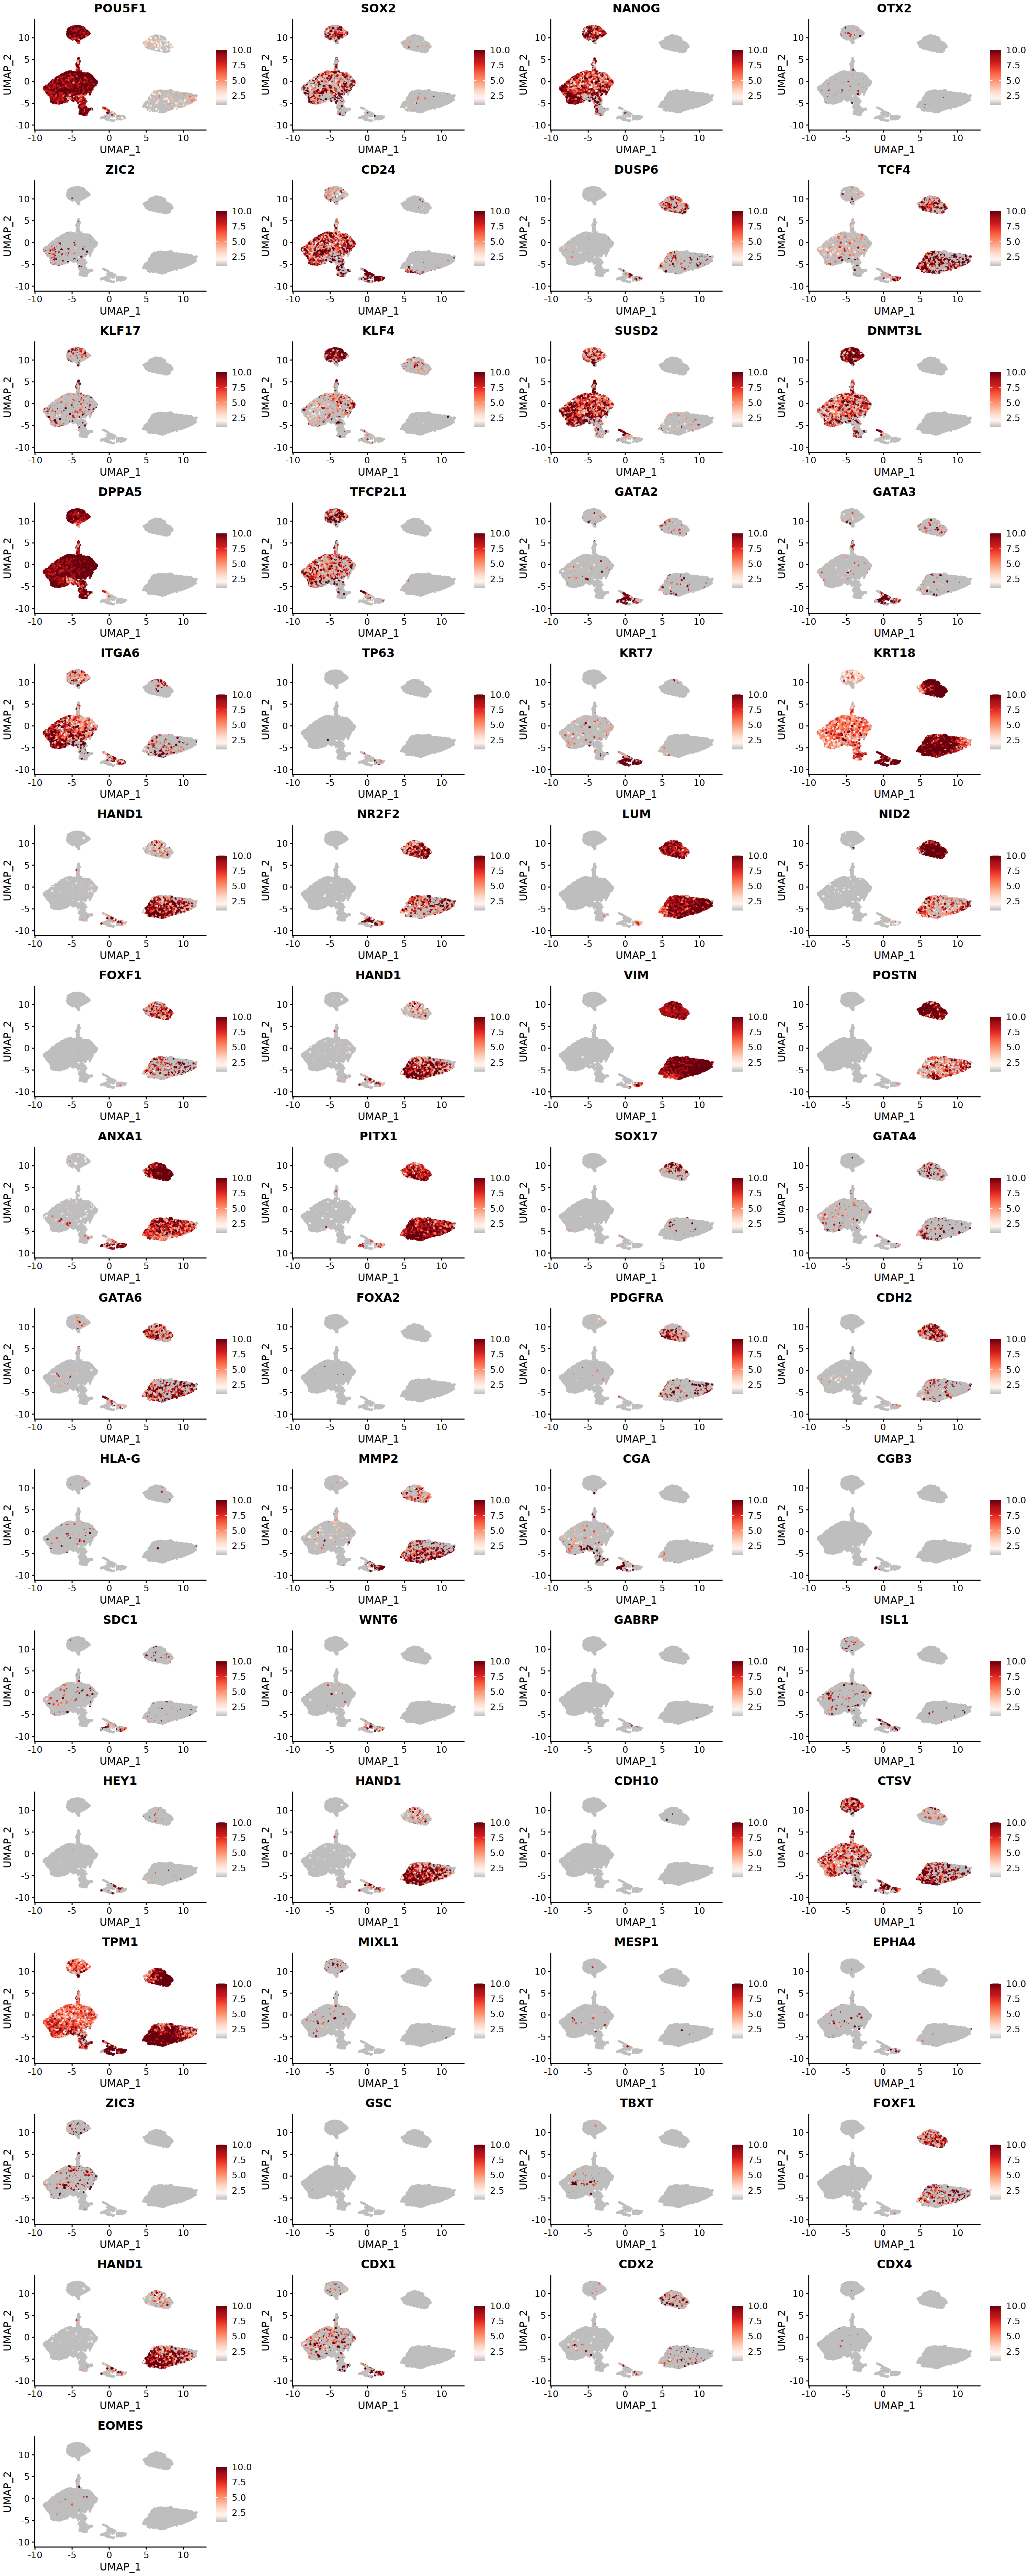

In [170]:
options(repr.plot.width = 20, repr.plot.height = 50, repr.plot.res = 150)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_2000,
  features = gene_list,
  pt.size = .5,
  max.cutoff = 'q75',
  ncol = 4
)

In [171]:
saveRDS(so_2000, "/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/timecourse_naive2TSCs_EXMCs/so_tc_naive2TSC_EXMC_2022.rds")

In [8]:
so_2000<- readRDS("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/timecourse_naive2TSCs_EXMCs/so_tc_naive2TSC_EXMC_2022.rds")

Warning message in DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "anno.cluster"):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: CK7”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



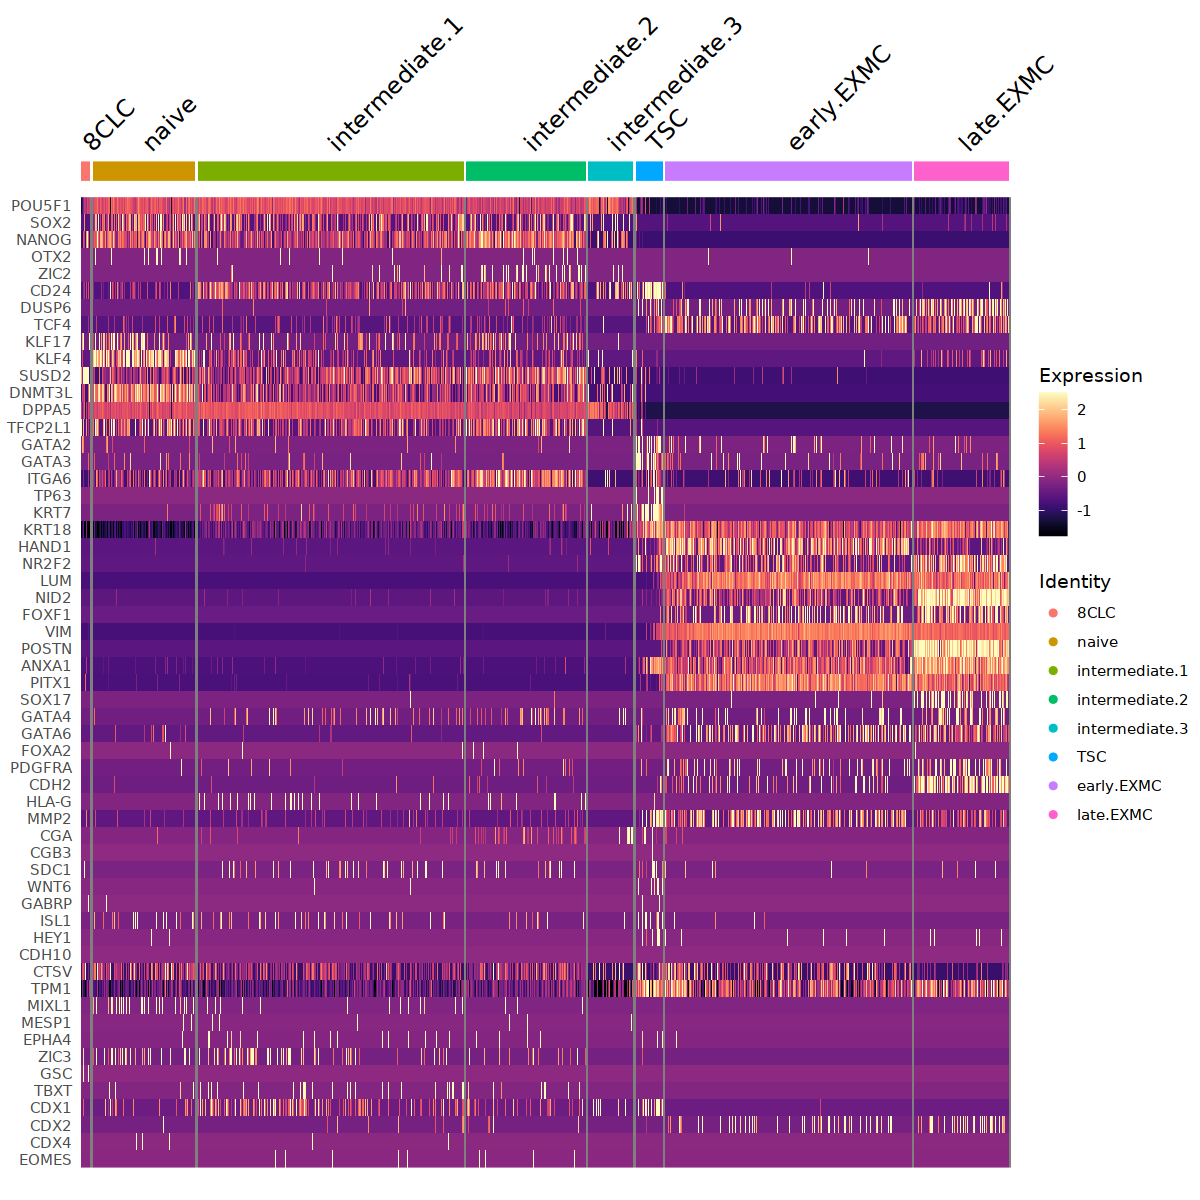

In [165]:
options(repr.plot.width=10, repr.plot.height=10)
heatmap<- DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "anno.cluster")+ scale_fill_viridis(option = "A")
heatmap

In [10]:
head(so_2000)

orig.ident nCount_RNA nFeature_RNA cell              
AAACCCATCTTCGCTG.1 tc_XA      29982      6390         AAACCCATCTTCGCTG.1
AAACGCTAGACCTTTG.1 tc_XA      58427      7486         AAACGCTAGACCTTTG.1
AAACGCTTCACCTCGT.1 tc_XA      37718      6780         AAACGCTTCACCTCGT.1
AAAGAACTCCCTCTAG.1 tc_XA      12857      3977         AAAGAACTCCCTCTAG.1
AAAGGATTCTCGCTCA.1 tc_XA      34149      6625         AAAGGATTCTCGCTCA.1
AAAGGGCAGTTCCGGC.1 tc_XA      39409      6588         AAAGGGCAGTTCCGGC.1
AAAGGGCGTCATCTAG.1 tc_XA       2558      1442         AAAGGGCGTCATCTAG.1
AAAGGTAAGGAACTCG.1 tc_XA      35177      6312         AAAGGTAAGGAACTCG.1
AAAGGTAGTATCGGTT.1 tc_XA      41374      6681         AAAGGTAGTATCGGTT.1
AAAGTCCTCGGAACTT.1 tc_XA       6275      2536         AAAGTCCTCGGAACTT.1
                   Samples percent.mt RNA_snn_res.0.2 seurat_clusters
AAACCCATCTTCGCTG.1 D0       5.409913  3               3              
AAACGCTAGACCTTTG.1 D0      11.005186  3               3              
AAACGCTTCACCTCGT.1 D0       5.302508  3               3              
AAAGAACTCCCTCTAG.1 D0       8.127868  3               3              
AAAGGATTCTCGCTCA.1 D0       6.020674  3               3              
AAAGGGCAGTTCCGGC.1 D0       4.826309  3               3              
AAAGGGCGTCATCTAG.1 D0      10.946052  3               3              
AAAGGTAAGGAACTCG.1 D0       7.908577  3               3              
AAAGGTAGTATCGGTT.1 D0      14.557452  3               3              
AAAGTCCTCGGAACTT.1 D0       4.366534  3               3              
                   anno.cluster
AAACCCATCTTCGCTG.1 naive       
AAACGCTAGACCTTTG.1 naive       
AAACGCTTCACCTCGT.1 naive       
AAAGAACTCCCTCTAG.1 naive       
AAAGGATTCTCGCTCA.1 naive       
AAAGGGCAGTTCCGGC.1 naive       
AAAGGGCGTCATCTAG.1 naive       
AAAGGTAAGGAACTCG.1 naive       
AAAGGTAGTATCGGTT.1 naive       
AAAGTCCTCGGAACTT.1 naive

In [24]:
so_2000$Day.anno<- as.character(so_2000$anno.cluster)

In [25]:
so_2000$Day.anno[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D8")]<- paste0(so_2000$Samples[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D8")], ".", so_2000$anno.cluster[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D8")])



In [28]:
so_2000$Day.anno[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D13")]<- paste0(so_2000$Samples[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D13")], ".", so_2000$anno.cluster[which(so_2000$anno.cluster=="early.EXMC"& so_2000$Samples=="D13")])



In [29]:
table(so_2000@meta.data$Day.anno)


          8CLC D13.early.EXMC  D8.early.EXMC     early.EXMC intermediate.1 
           137            312              3           3200           3786 
intermediate.2 intermediate.3      late.EXMC          naive            TSC 
          1707            637           1350           1462            384 

Warning message in DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "Day.anno"):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: CK7”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



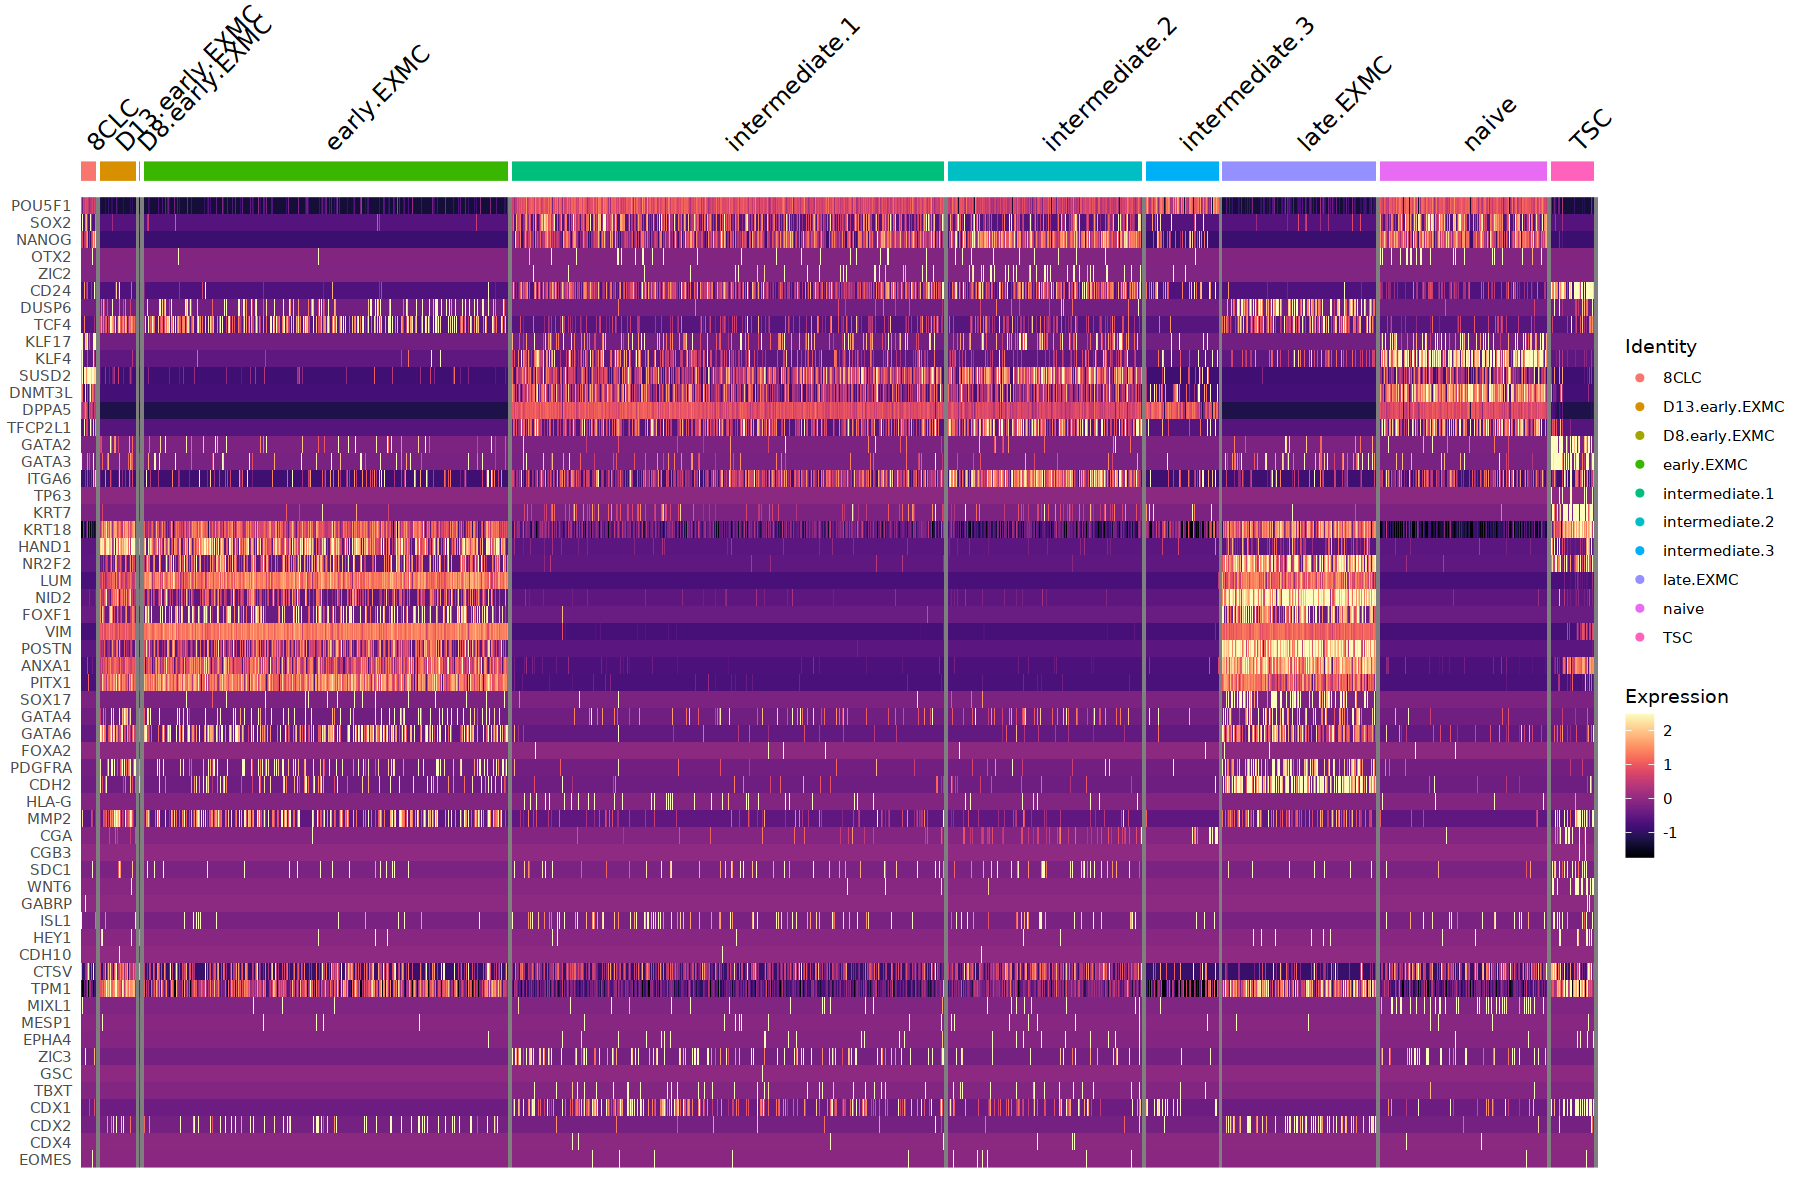

In [32]:
options(repr.plot.width=15, repr.plot.height=10)
heatmap<- DoHeatmap(so_2000, features = gene_list, size = 5, group.by = "Day.anno")+ scale_fill_viridis(option = "A")
heatmap